In [68]:
#Logistic Regression
#Perceptron trick
# Basis of Deep Learning

In [69]:
#Data should be linearly separable
# or almost linearly separable

#The line to separate the data = Ax + By + C = 0
#Perceptron Trick - Loop
# 1. Random point selection
# 2. In case the point is correctly classified, no changes
# 3. In case the point is misclassified, the line is transformed so as to correctly classify the point

In [70]:
# how are regions labelled??
# if point:
# Ax + By + C > 0 - positive region
# Ax + By + C < 0 - negative region

# Transformations
# if point is positive and misclassified add the coordinates to the coefficients of the line (C = 1 by default in 2D)
# if point is negative and misclassified subtract the coordinates to the coefficients of the line (C = 1 by default in 2D)
# we also use a learning rate to do this smoothly instead of making super huge steps, the learning rate is simply multiplied to
# the coordinates subtracted or added 

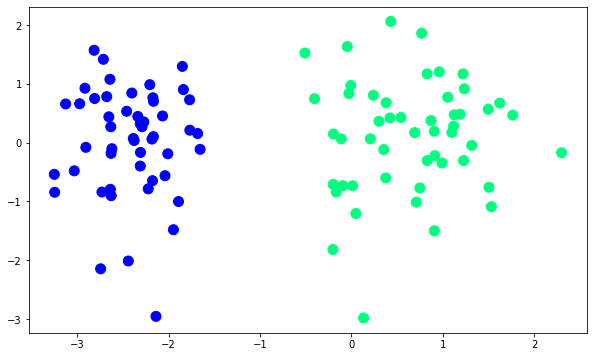

In [71]:
# Perceptron Trick Code


from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [72]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0], weights[1:]

In [73]:
intercept_, coef_ = perceptron(X,y)

print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

[1.16155716 0.30654348]
1.2000000000000002


(-3.0, 2.0)

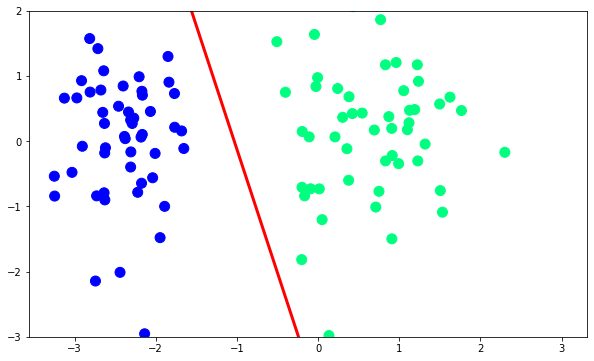

In [74]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [75]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [76]:
m,b = perceptron(X,y)

In [77]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

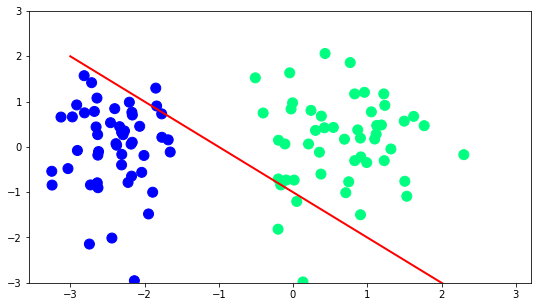

In [78]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

(-3.0, 2.0)

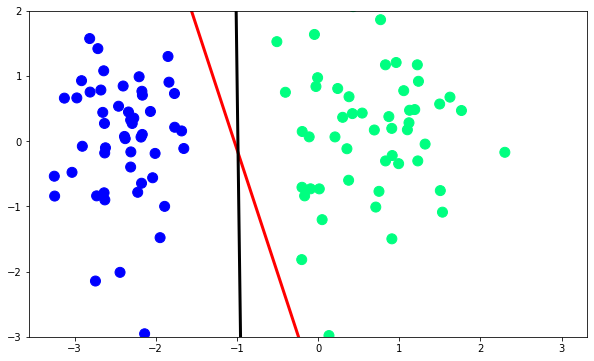

In [79]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])


x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [80]:
# Now for getting the logistic regression as in sklearn approach
# the classified points will also be responsible for moving the line
# for now we will use the sigmoid function instead of the step function

In [81]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0], weights[1:]

In [82]:
intercept_, coef_ = perceptron(X,y)

print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

[3.4808485 0.0707152]
2.8999662672028403


(-3.0, 2.0)

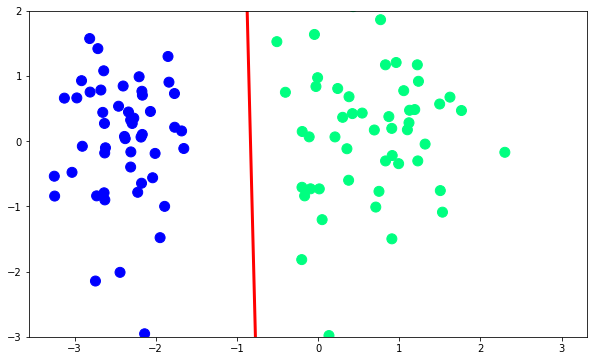

In [83]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)